# Assignment 3 and 4
## Due date: Friday 24th 22:00
- Write your own code in the blanks. It is okay to collaborate with other students, but **both students must write their own code** (No C&P!) and write the name of the other student in this cell. In case you adapt code from other sources you also must give that user credit (a comment with the link to the source suffices)
- Complete the blanks, adding comments to explain what you are doing
- Each plot must have labels


Collaborated with:

## Problem 1: Who owns corporate America
`You are going to work with some data that we used to show that passive investors own corporate America`

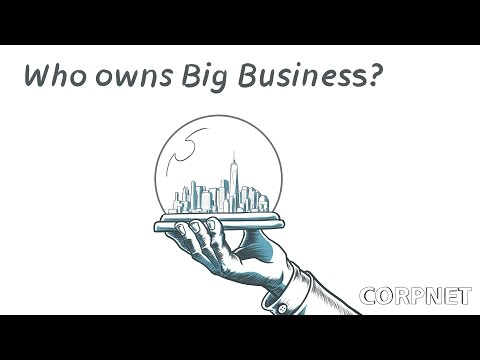

In [1]:
#Watch this video first to understand the project
from IPython.display import YouTubeVideo
YouTubeVideo('OYpCxXuF3M8')

`I modified a bit the data, changing encodings, adding several variables in the same column and splitting it into several datasets. You'll need to fix it`
- `The first one (company_data.csv) has information on the company name, the company ID, the percentage of ownership of the Big 3 passive investors (Big3Share), their rank as shareholders (position, 1 = largest shareholder) and some financials.`
- `The second one (employees.csv) has information on the company ID and the number of employees`

`You'll replicate some figures from the paper, and will create some new ones`

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML o
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np

In [3]:
!head data/company_data.csv

Company_name	Company_ID	Big3Share	Position	Exchange	TypeEnt	VAR	Dollars_th
INVESCO LTD	BM40671R	17.85	1	New York Stock Exchange (NYSE)	Bank	Revenue	$7500000.0
ROYAL CARIBBEAN CRUISES LTD	LR30002MX	14.32	3	New York Stock Exchange (NYSE)	Industrial company	Revenue	$7500000.0
GENCO SHIPPING & TRADING LTD	MH30004AQ	0.14	31	New York Stock Exchange (NYSE)	Industrial company	Revenue	$350000.0
EAGLE BULK SHIPPING INC	MH40003AQ	2.85	9	NASDAQ National Market	Industrial company	Revenue	$350000.0
POWERSHARES DB US DOLLAR INDEX BEARISH	US*S00100679	0.0	101	NYSE ARCA	Industrial company	Revenue	
POWERSHARES FTSE RAFI DEVELOPED MARKETS	US*S00101964	0.0	101	NYSE ARCA	Industrial company	Revenue	
XENITH BANKSHARES INC	US*S00120641	0.0	107	NASDAQ National Market	Industrial company	Revenue	
GAMCO NATURAL RESOURCES, GOLD & INCOME TRUST	US*S00136468	0.0	102	New York Stock Exchange (NYSE)	Industrial company	Revenue	
JOHN HANCOCK HEDGED EQUITY & INCOME FUND	US*S00138046	0.0	105	New York Stock Exchange (NYSE)	I

## 1. Read file "data/company_data.csv" (beware the encoding) and print header

In [ ]:
df = pd.read_csv(......)
df.head()

## 2. Describe the dataset, print the dtypes and fix the problem with the dollar symbol

In [ ]:
#Use df.describe() to see how it looks like. Why is dollars_th not there? (describe only describes numeric columns)


In [2]:
#Print dtypes (object == strings)

In [ ]:
#Use df["Dollars_th"].str.replace() to delete the first character
#You can also use df["Dollars_th"].str.slice() if it's easier for you.
df["Dollars_th"] = df["Dollars_th"].str.replace()

#Convert to type float
df["Dollars_th"] = df["Dollars_th"].astype(...)

In [ ]:
df.head()

## 3. Tidy the table (pivot or melt)

In [ ]:
##First think about what variables are in the dataset


##Pivot or Melt to tidy format

...



df_fixed.head()

## 4. Read the dataset data/employees.csv and merge with the ohter

In [ ]:
#Read the other dataset
df_emp = pd.read_csv("data/employees.csv",sep="\t")
df_emp.head()

In [ ]:
#Merge the datafiles
df_merged = ...
df_merged.head()

## 5. Replicate figures similar to the ones in the paper
- The variable "Position" ranks the position of the Big3 among the investors of the company. Use pd.cut to create four categories: Big3 as largest shareholder (position 1). Big3 as second largest shareholder (position 2). Big3 as third largest shareholder (position 3). Big3 not one of the third largest shareholder (position 4 to end)
- Plot the average ownership by category
- Plot the sum of market capitalization by category
- Plot the normalized sum of market capitalization by category

Control the aesthetics of the plot, make the figure of a nice size, delete the edges of the bars and despine the figure (sns.despine())

In [10]:
#Create the variable described above
df_merged["Cat_Big3"] = pd.cut(.....)

In [ ]:
#Plot the average onwership (Big3Share) for each of the 4 categories (barplot, boxplot or violinplot). 
#Use the same color for all bars and fix the labels

#Make the plot (with a nice size)
....

#Add some labels
plt.xlabel(....)
plt.ylabel(....)

#Despine
sns.despine()

In [ ]:
#Plot the sum of market capitalization (MarketCap) for each of the 4 categories (barplot).
#To plot the sum instead of the average you need to use the option ",estimator=sum" in the barplot
#Use the same color for all bars and fix the labels
sns.catplot(..... ,kind="bar",estimator=sum)


In [ ]:
#Create a variable with the normalized market capitalization that sums up to 100
#Make sure you understand this line.
df_merged["MarketCap_Sum100"] = 100*df_merged["MarketCap"]/np.sum(df_merged["MarketCap"])

#Redo the plot
sns.catplot(..... ,kind="bar",estimator=sum)

## 6. Transform financials into log scale and plot distributions

In [14]:
#Transform financial variables to log
df_merged["log_Employees"] = ...
df_merged["log_Revenue"] = ...
df_merged["log_Assets"] = ...
df_merged["log_MarketCap"] = ...

#Delete infinite values (they occur when you take the logarithm of zero) and drop missing values in any row
#Make sure you understand this line too
df_merged = df_merged.replace([np.inf,-np.inf],np.nan)
df_merged = df_merged.dropna()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


In [ ]:
#Make histograms (sns.distplot) for all variables. 
#Try both hist=True (default) and hist=False to see the difference
plt.figure(figsize=(6,3)
sns.distplot(df_merged["log_Employees"],label='emp',hist=True) #histogram of log of employees
sns.distplot(......,label="rev",hist=True)
sns.distplot(......,label="assets",hist=True)
sns.distplot(......,label="mark",hist=True)
plt.legend()

## 7. Make some plots to visualize how assets, market capitalization and employees correlate for different types of companies



In [ ]:
#Make a scatter plot (lmplot) of x = assets and y = market capitalization with hue = TypeEnt
#It'll be too cluttered
#Use the option ,truncate=True
.....

## Keep a subset of the data with banks and industrial companies and do the plot again
- Make white background (controlling aesthetics): http://seaborn.pydata.org/tutorial/aesthetics.html
- Use xlim and ylim
- Make the dots a bit smaller and a bit transparent
- Save the figure (pdf)

In [ ]:
#Keep a subset of the data with banks and industrial companies
df_bank_industr = df_merged.loc[.......,:]
df_bank_industr.head()

In [ ]:
#Set the background to white with sns.set_style (see http://seaborn.pydata.org/tutorial/aesthetics.html)
......


In [ ]:
#Make a scatter plot of x = assets and y = market capitalization with hue = Type of ent
sns.lmplot(.... , #add the normal stuff
           size=3,
           aspect=...., #add the aspect
           scatter_kws=, #make the dots a bit smaller and a bit transparent (see the exercise with dinosaur)
          )

#make labels (plt.xlabel...)

#Change limits (plt.xlim...)

## Interpret the figure that you just made (a couple lines is okay)

answer here

## Use the same subset of companies to plot log of assets versus log of market capitalization

In [ ]:
#Make a scatter plot of x = assets and y = market capitalization with hue = Type of ent for the data df_bank_industr
....

##  Problem 2: Pre-register your study
- Create an account in OSF
- Follow the instructions: http://help.osf.io/m/registrations/l/546603-enter-the-preregistration-challenge
- Once you're done publish it and write the url here: xxxx

    You don't need to spend a crazy amount of time for each answer.

## Problem 3: Read, melt, pivot, groupby
1. Download your datasets for the quantitative design
2. Print the types of variables (.dtypes). Explain what type of variables you have in each dataset (only the ones you plan to use) and if you need to modify them (e.g. taking the logarithm, making bins, converting categories to numbers, etc)
3. Fix the format to make it tidy (Melt/Pivot). 
4. Concat/Merge the datasets if you have several
5. Save your combined into a file (so you don't have to do the other things every time). Use the option index=None.
6. Data quality: Describe the data and visualize the relationship between all (or 10 if there are too many) variables with a scatter plot matrix and/or a correlation matrix. Do you have outliers?
7. Data qualtiy: Do you have missing data? What type? (MCAR,MAR,MNAR). Correct your file for it by imputing or dropping them.
8. Do you have two categorical variables? Then create a contingency table and run the chi2 test to see if they are related.
9. Use groupby to find the confidence intervals of one of your quantitative variables per group.
10. Do some other cool plot and interpret it.
    
    
    #Number 9 will be something like this:
    for gr,data in df.groupby("categorical_var"):
        sns.distplot(data["quant_var"].dropna())
        bootstrap....

`
Note: If you don't need to do 3 (because your data is tidy), 4 (because you only have one dataset), 8 (because you do not have two categorical variables) or 9 (because you do not have one categorical variables), then do more plots in number 10.

In [4]:
#1. Download your datasets for the quantitative design

#2. Print the types of variables (.dtypes). Explain what type of variables you have in each dataset (only the ones you plan to use) and if you need to modify them (e.g. taking the logarithm, making bins, converting categories to numbers, etc)

#3. Fix the format to make it tidy (Melt/Pivot). 

#4. Concat/Merge the datasets if you have several

#5. Save your combined into a file (so you don't have to do the other things every time). Use the option index=None.

#6. Data quality: Describe the data and visualize the relationship between all (or 10 if there are too many) variables with a scatter plot matrix and/or a correlation matrix. Do you have outliers?

#7. Data qualtiy: Do you have missing data? What type? (MCAR,MAR,MNAR). Correct your file for it by imputing or dropping them.

#8. Do you have two categorical variables? Then create a contingency table and run the chi2 test to see if they are related.

#9. Use groupby to find the confidence intervals of one of your quantitative variables per group.

#10. Do some other cool plot and interpret it.